In [39]:
# PASTE THIS TO THE FIRST CELL OF THE NOTEBOOK IN ORDER TO HAVE WORKING IMPORTS
import sys
import os
current_dir = os.getcwd()
parent_parent_dir = os.path.abspath(os.path.join(current_dir, '../..')) # tweak so that you get the root project folder

sys.path.append(parent_parent_dir)

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast

In [41]:
from src.features.get_x_y_tuples import get_x_y_tuple_list

#import data k729_2022
df_k729_2022_cuid = pd.read_csv('../../data/processed/k729_2022_cuid.csv')
df_cuid_k729_2022_grouped = pd.read_csv('../../data/processed/k729_2022_cuid_grouped.csv')
df_cuid_k729_2022_grouped['x'] = df_cuid_k729_2022_grouped['x'].apply(lambda x: ast.literal_eval(x))
df_cuid_k729_2022_grouped['y'] = df_cuid_k729_2022_grouped['y'].apply(lambda y: ast.literal_eval(y))
list_x_y_tuples_k729_2022 = get_x_y_tuple_list(df_cuid_k729_2022_grouped, ['x','y'])

# import data k733_2020
df_k733_2020_cuid = pd.read_csv('../../data/processed/k733_2020_cuid.csv')
df_k733_2020_cuid_grouped = pd.read_csv('../../data/processed/k733_2020_cuid_grouped.csv')
df_k733_2020_cuid_grouped['x'] = df_k733_2020_cuid_grouped['x'].apply(lambda x: ast.literal_eval(x))
df_k733_2020_cuid_grouped['y'] = df_k733_2020_cuid_grouped['y'].apply(lambda y: ast.literal_eval(y))
list_x_y_tuples_k733_2020 = get_x_y_tuple_list(df_k733_2020_cuid_grouped, ['x','y'])

#import data k733_2018
df_k733_2018_cuid = pd.read_csv('../../data/processed/k733_2018_cuid.csv')
df_k733_2018_cuid_grouped = pd.read_csv('../../data/processed/k733_2018_cuid_grouped.csv')
df_k733_2018_cuid_grouped['x'] = df_k733_2018_cuid_grouped['x'].apply(lambda x: ast.literal_eval(x))
df_k733_2018_cuid_grouped['y'] = df_k733_2018_cuid_grouped['y'].apply(lambda y: ast.literal_eval(y))
list_x_y_tuples_k733_2018 = get_x_y_tuple_list(df_k733_2018_cuid_grouped, ['x','y'])


In [42]:
from src.features.get_first_and_last_x_y_coordinates import *
from src.features.get_first_coordinates import get_first_x_y_coordinates
from src.features.get_last_coordinates import get_last_x_y_coordinates

first_last_x_coords_k729_2022, first_last_y_coords_k729_2022 = get_first_and_last_x_y_coordinates(list_x_y_tuples_k729_2022)
X_k729_2022 = np.array([first_last_x_coords_k729_2022, first_last_y_coords_k729_2022]).T
first_last_x_coords_k733_2020, first_last_y_coords_k733_2020 = get_first_and_last_x_y_coordinates(list_x_y_tuples_k733_2020)
X_k733_2020 = np.array([first_last_x_coords_k733_2020, first_last_y_coords_k733_2020]).T
first_last_x_coords_k733_2018, first_last_y_coords_k733_2018 = get_first_and_last_x_y_coordinates(list_x_y_tuples_k733_2018)
X_k733_2018 = np.array([first_last_x_coords_k733_2018, first_last_y_coords_k733_2018]).T


In [43]:
# Define number of clusters for KMeans
n_clusters = 5  # Adjust this based on your data or requirement

In [44]:
from sklearn.cluster import KMeans
# Fit K-Means to the data
def fit_kmeans(n_clusters, X):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    return labels, centers

In [45]:
# Fit the KMeans model and get the labels and centers
labels_kmeans_k729_2022, centers_kmeans_k729_2022 = fit_kmeans(n_clusters, X_k729_2022)
labels_kmeans_k733_2020, centers_kmeans_k733_2020 = fit_kmeans(n_clusters, X_k733_2020)
labels_kmeans_k733_2018, centers_kmeans_k733_2018 = fit_kmeans(n_clusters, X_k733_2018)

In [50]:

# Plot the clustered data using KMeans
from src.visualization.get_cluster_colors import get_cluster_colors
from src.visualization.get_cluster_legend_handles import get_cluster_legend_handles

point_colors_kmeans_k729_2022, colors_kmeans_k729_2022 = get_cluster_colors(labels_kmeans_k729_2022)
legend_handles_kmeans_k729_2022 = get_cluster_legend_handles(colors_kmeans_k729_2022, labels_kmeans_k729_2022)

point_color_kmeans_k733_2020, colors_kmeans_k733_2020 = get_cluster_colors(labels_kmeans_k733_2020)
legend_handles_kmeans_k733_2020 = get_cluster_legend_handles(colors_kmeans_k733_2020, labels_kmeans_k733_2020)

point_color_kmeans_k733_2018, colors_kmeans_k733_2018 = get_cluster_colors(labels_kmeans_k733_2018)
legend_handles_kmeans_k733_2018 = get_cluster_legend_handles(colors_kmeans_k733_2018, labels_kmeans_k733_2018)

### Create description texts (can be omitted if not needed)
clustering_description = f'K-Means clustering with {n_clusters} clusters'
optimization_parameters_description = f'Number of clusters: {n_clusters}'

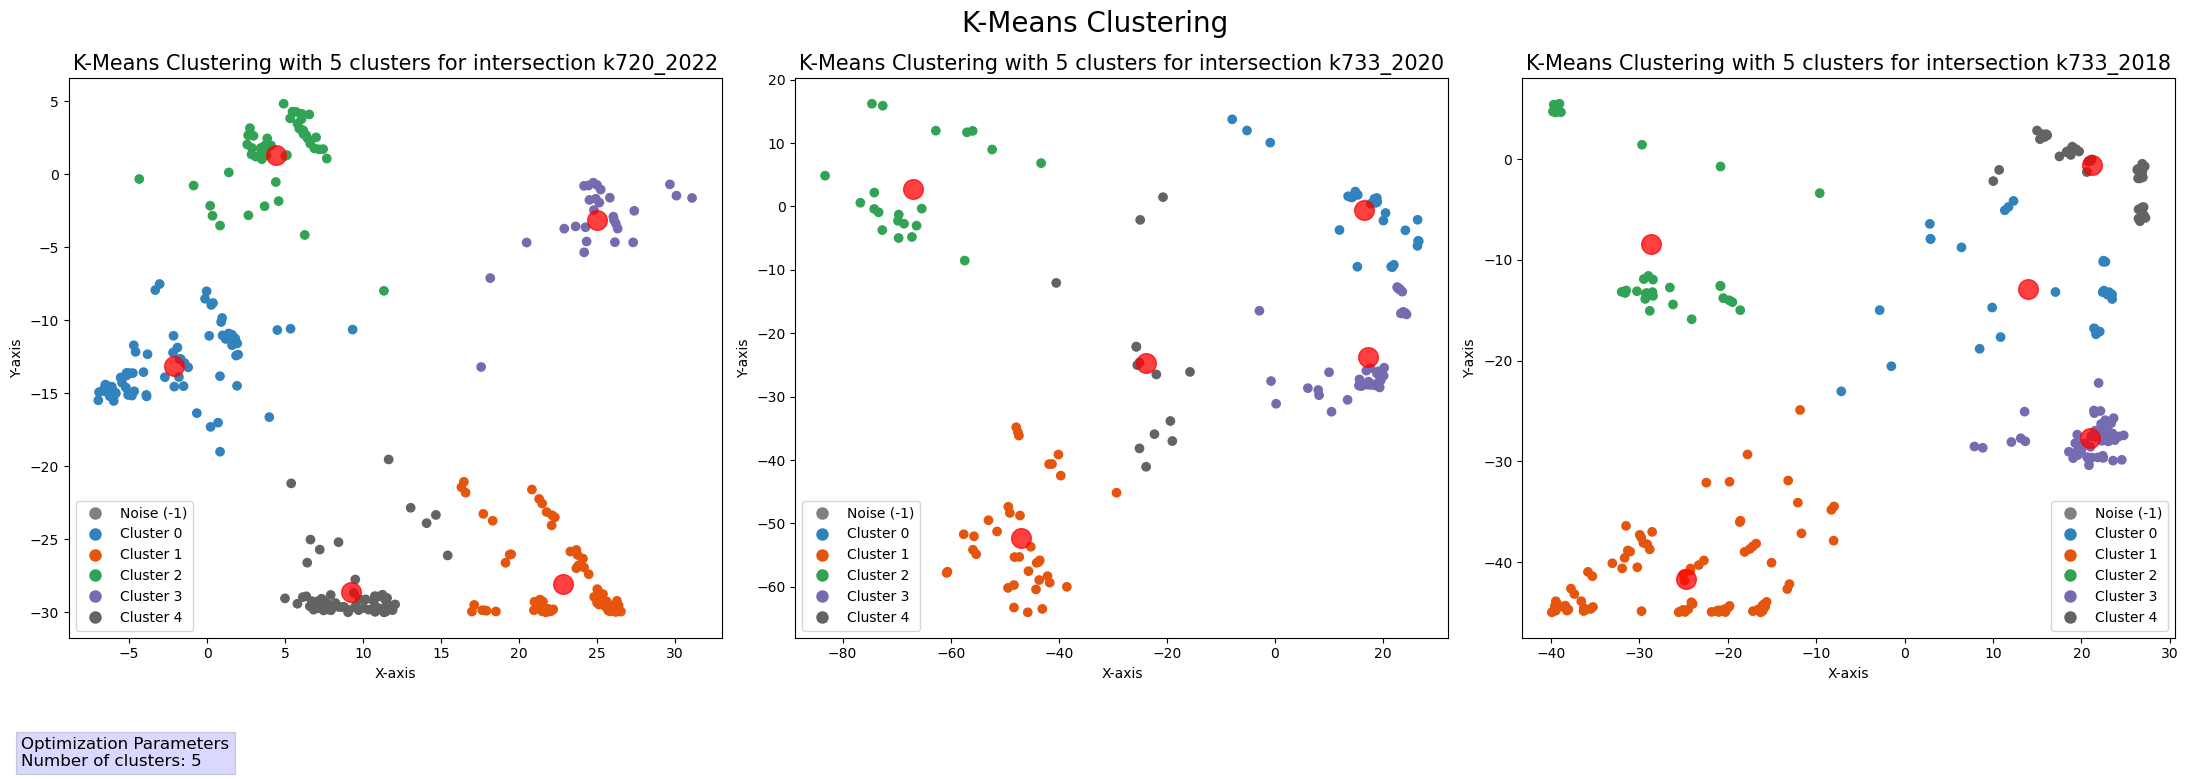

In [51]:
### Plot the KMeans clustering results
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(22, 7))
gs = GridSpec(1, 3, figure=fig)

ax1 = fig.add_subplot(gs[0, 0]) 
ax1.scatter(first_last_x_coords_k729_2022, first_last_y_coords_k729_2022, c=point_colors_kmeans_k729_2022)
ax1.scatter(centers_kmeans_k729_2022[:, 0], centers_kmeans_k729_2022[:, 1], c='red', s=200, alpha=0.75, label='Cluster Centers')
ax1.set_title(f'K-Means Clustering with {n_clusters} clusters for intersection k720_2022', fontsize=15)
ax1.set_xlabel("X-axis")
ax1.set_ylabel("Y-axis")
ax1.legend(handles=legend_handles_kmeans_k729_2022)

ax2 = fig.add_subplot(gs[0, 1])
ax2.scatter(first_last_x_coords_k733_2020, first_last_y_coords_k733_2020, c=point_color_kmeans_k733_2020)
ax2.scatter(centers_kmeans_k733_2020[:, 0], centers_kmeans_k733_2020[:, 1], c='red', s=200, alpha=0.75, label='Cluster Centers')
ax2.set_title(f'K-Means Clustering with {n_clusters} clusters for intersection k733_2020', fontsize=15)
ax2.set_xlabel("X-axis")
ax2.set_ylabel("Y-axis")
ax2.legend(handles=legend_handles_kmeans_k733_2020)

ax3 = fig.add_subplot(gs[0, 2])
ax3.scatter(first_last_x_coords_k733_2018, first_last_y_coords_k733_2018, c=point_color_kmeans_k733_2018)
ax3.scatter(centers_kmeans_k733_2018[:, 0], centers_kmeans_k733_2018[:, 1], c='red', s=200, alpha=0.75, label='Cluster Centers')
ax3.set_title(f'K-Means Clustering with {n_clusters} clusters for intersection k733_2018', fontsize=15)
ax3.set_xlabel("X-axis")
ax3.set_ylabel("Y-axis")
ax3.legend(handles=legend_handles_kmeans_k733_2018)


# ### Optionally create description text below the plot
# props_results = dict(boxstyle='square', facecolor='green', alpha=0.15)
# fig.text(0.012, -0.02, f'{clustering_description}', fontsize=12, bbox=props_results)

props_optimization_parameters = dict(boxstyle='square', facecolor='blue', alpha=0.15)
fig.text(0.012, -0.1, f'Optimization Parameters\n{optimization_parameters_description}', fontsize=12, bbox=props_optimization_parameters)

plt.suptitle(f'K-Means Clustering', fontsize=20)

# Display the plots
plt.tight_layout()
plt.show()